In [1]:

#Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Employee Attrition.csv')

In [3]:
# Remove duplicate rows
df_dedup = df.drop_duplicates()
df_dedup.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [5]:
# Fill missing values (example: replacing numeric columns with mean, categorical with mode)
df['DistanceFromHome'] = df['DistanceFromHome'].fillna(df['DistanceFromHome'].mean())
df['JobRole'] = df['JobRole'].fillna(df['JobRole'].mode()[0])
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mean())
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mode()[0])

# Summary statistics
print("Summary Statistics:\n", df.describe())

Summary Statistics:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        6

Mean Income: 6502.931292517007, Median Income: 4919.0, Mode Income: 2342


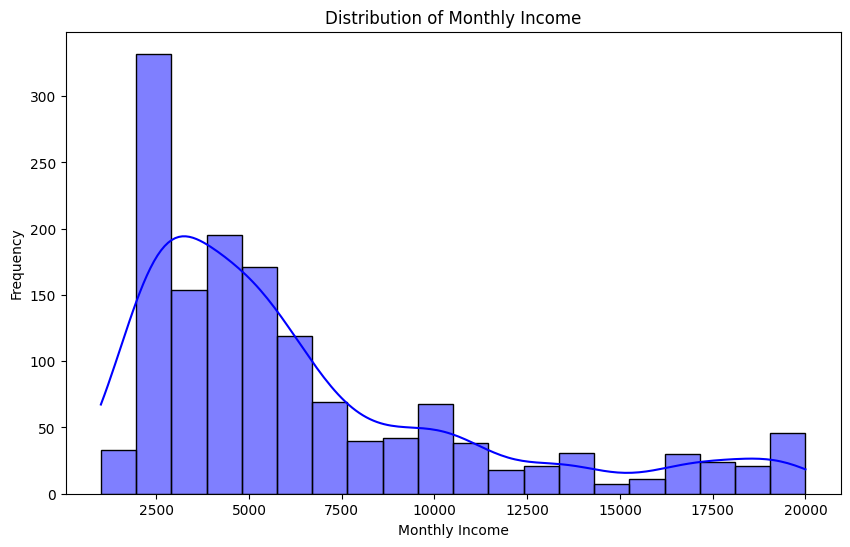

In [6]:
# Central tendency for 'MonthlyIncome'
mean_income = df['MonthlyIncome'].mean()
median_income = df['MonthlyIncome'].median()
mode_income = df['MonthlyIncome'].mode()[0]
print(f"Mean Income: {mean_income}, Median Income: {median_income}, Mode Income: {mode_income}")

# Histogram for 'MonthlyIncome'
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], kde=True, color='blue')
plt.title("Distribution of Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.show()

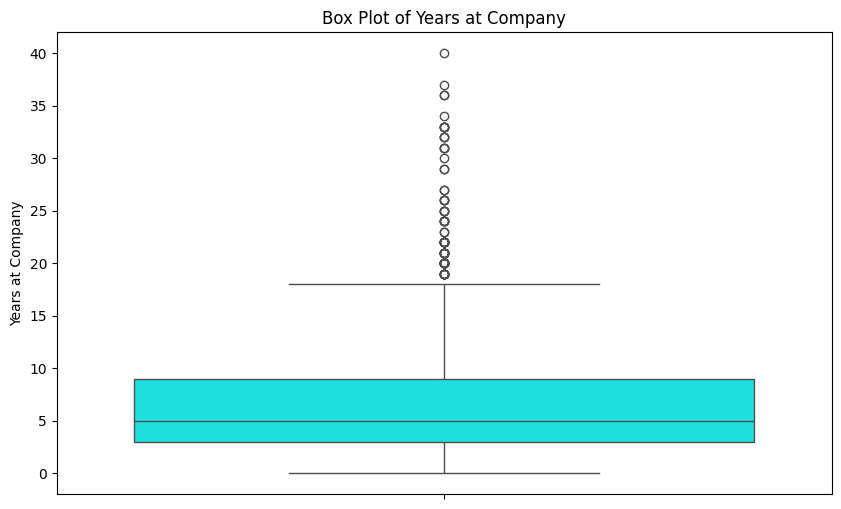

In [7]:
# Box plot for 'YearsAtCompany'
plt.figure(figsize=(10, 6))
sns.boxplot(y='YearsAtCompany', data=df, color='cyan')
plt.title("Box Plot of Years at Company")
plt.ylabel("Years at Company")
plt.show()

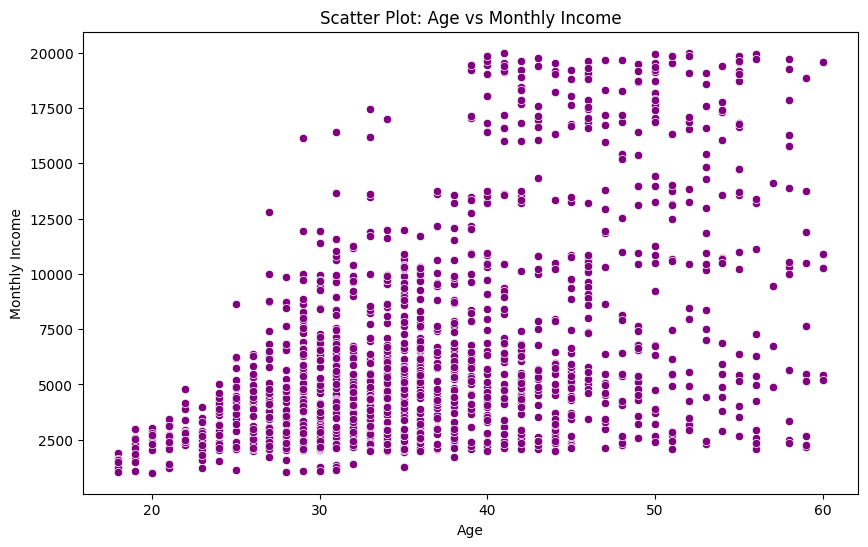

In [8]:
# Scatter plot for 'Age' vs 'MonthlyIncome'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', data=df, color='purple')
plt.title("Scatter Plot: Age vs Monthly Income")
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.show()

<ipython-input-9-5c496cc45e59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, palette='Set2')


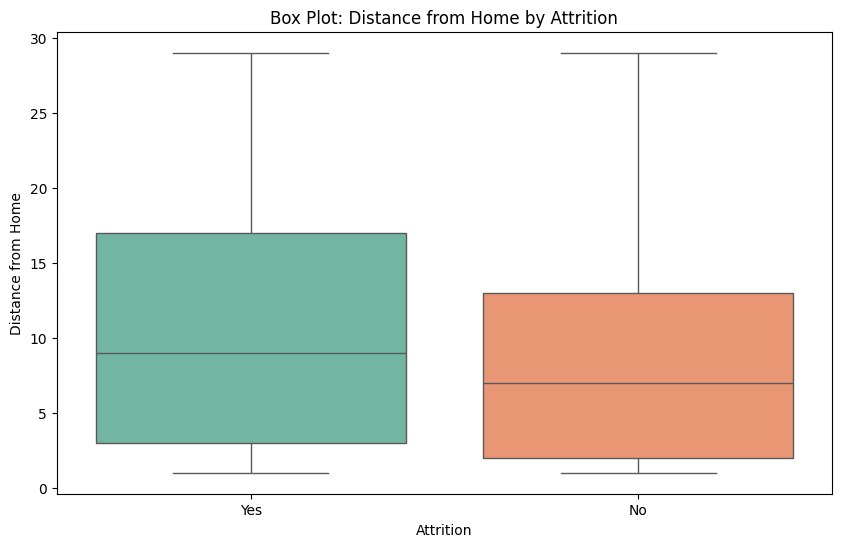

In [9]:
# Box plot for 'DistanceFromHome' by 'Attrition'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, palette='Set2')
plt.title("Box Plot: Distance from Home by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distance from Home")
plt.show()

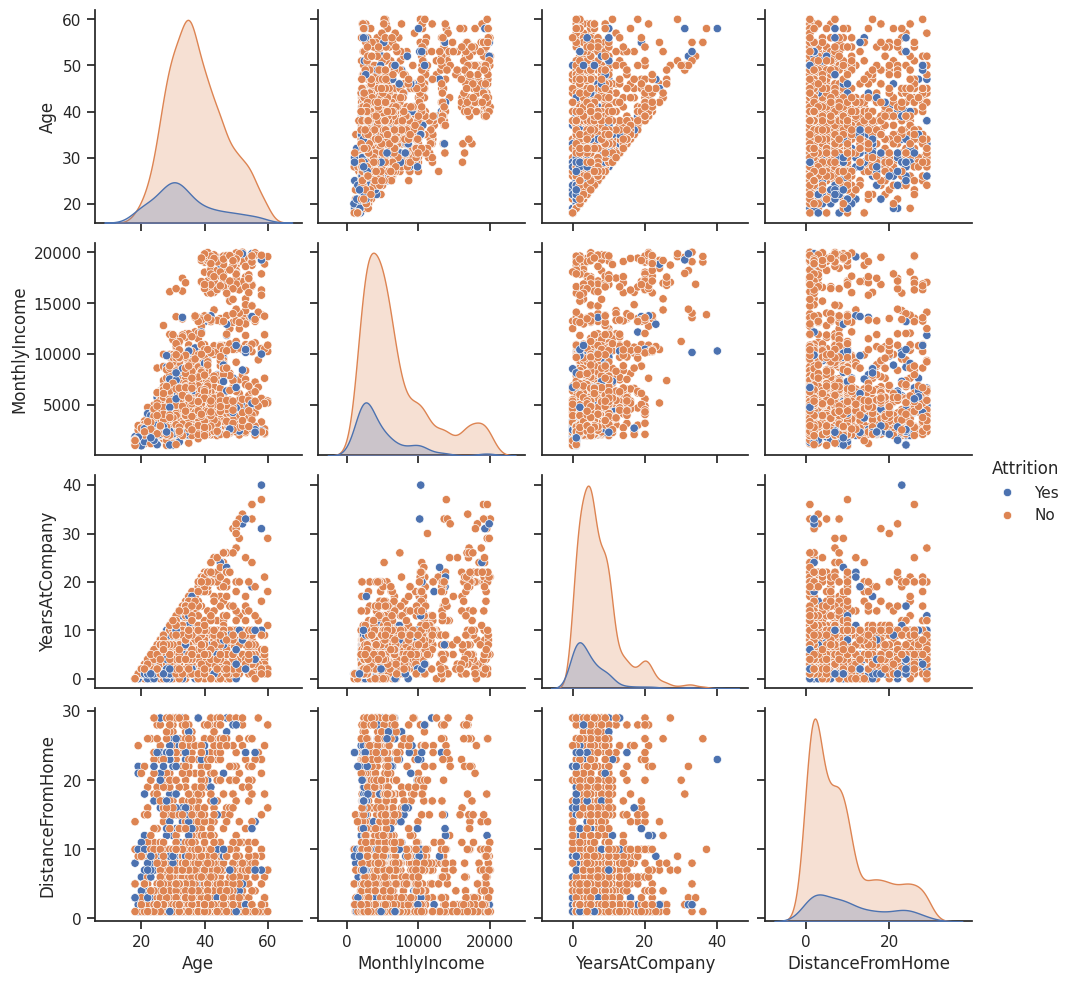

In [10]:
# Pair plot for selected numeric variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, vars=['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome'], hue='Attrition')
plt.show()


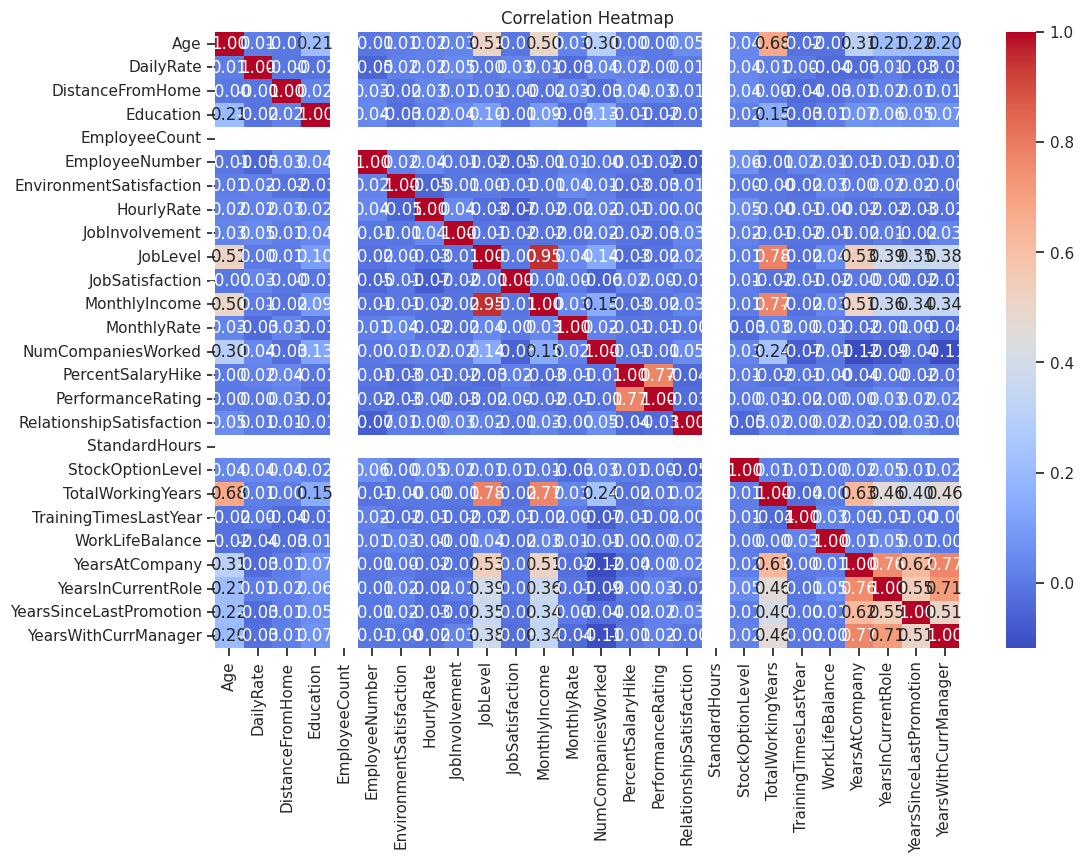

In [11]:
# Correlation heatmap for numeric variables
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

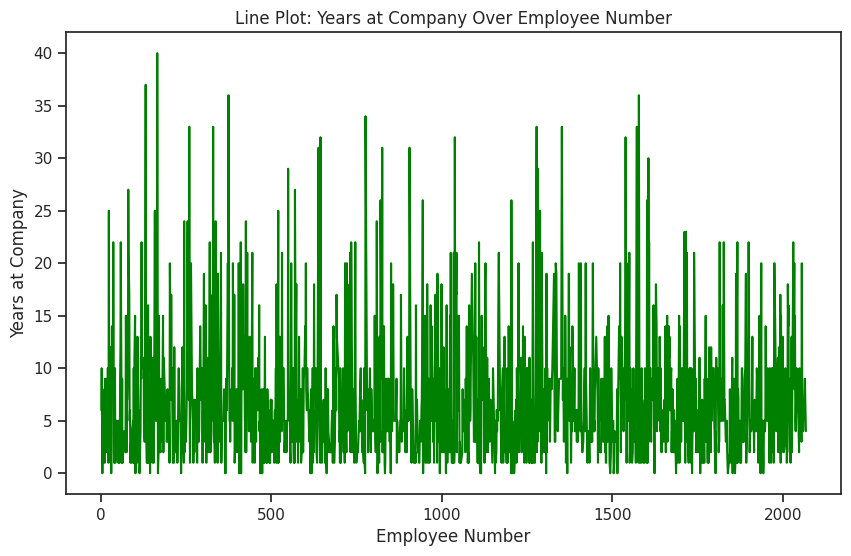

In [12]:
# Line plot for 'YearsAtCompany' over time (using EmployeeNumber as a proxy for time)
plt.figure(figsize=(10, 6))
sns.lineplot(x='EmployeeNumber', y='YearsAtCompany', data=df, color='green')
plt.title("Line Plot: Years at Company Over Employee Number")
plt.xlabel("Employee Number")
plt.ylabel("Years at Company")
plt.show()